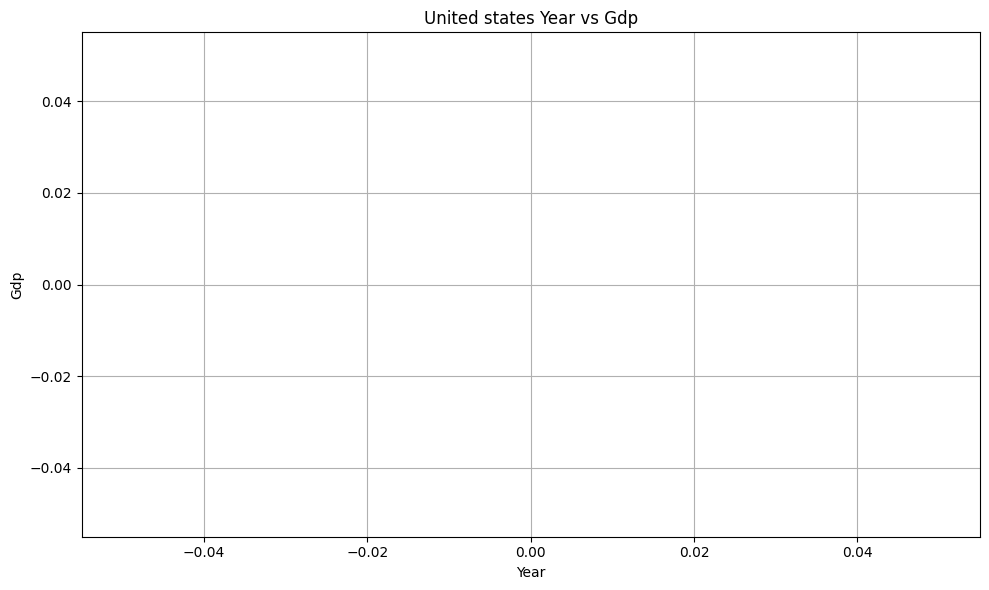

In [ ]:
import sqlite3
import matplotlib.pyplot as plt

db = sqlite3.connect('backset.db')
c = db.cursor()

_type = "United States | emissions vs year vs spending"
_type = _type.split(" | ")
topic_country = _type[0]
terms = [ x.replace(" ", "") for x in _type[1].split("vs")]

command_indicies = {
    "year": 1,
    "spending": 2,
    "emissions": 3,
    "gdp": 4,
    "population": 5,
}

c.execute(f"SELECT * FROM fullpull WHERE country = '{topic_country.capitalize()}'")
out = c.fetchall()
if len(terms) == 2:
    plt.figure(figsize=(10, 6))
    plt.title(f"{topic_country.capitalize()} {terms[0].capitalize()} vs {terms[1].capitalize()}")
    plt.xlabel(terms[0].capitalize())
    plt.ylabel(terms[1].capitalize())
    t1 = []
    t2 = []
    for row in out:
        t1.append(row[command_indicies[terms[0]]])
        t2.append(row[command_indicies[terms[1]]])

    plt.plot(t1, t2, marker='o')
    plt.grid()
    plt.tight_layout()
    plt.show()
elif len(terms) == 3:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(f"{topic_country.capitalize()} {terms[0].capitalize()} vs {terms[1].capitalize()} vs {terms[2].capitalize()}")
    ax.set_xlabel(terms[0].capitalize())
    ax.set_ylabel(terms[1].capitalize())
    ax.set_zlabel(terms[2].capitalize())
    t1 = []
    t2 = []
    t3 = []
    for row in out:
        val1 = row[command_indicies[terms[0]]]
        val2 = row[command_indicies[terms[1]]]
        val3 = row[command_indicies[terms[2]]]
        if val1 != '' and val2 != '' and val3 != '':
            t1.append(float(val1) if val1 != '' else 0)
            t2.append(float(val2) if val2 != '' else 0)
            t3.append(float(val3) if val3 != '' else 0)

    ax.scatter(t1, t2, t3, c='r', marker='o')
    
    # Add lines connecting the points for better visualization
    ax.plot(t1, t2, t3, c='b', linestyle='-')
    
    # Add data point labels (years)
    for i, year in enumerate(years[:len(t1)]):
        ax.text(t1[i], t2[i], t3[i], year, size=8)
    
    plt.tight_layout()
    plt.show()
else:
    print("Invalid number of terms. Please provide 2 or 3 terms for comparison.")
    exit(1)